# Instance Normalization - Image Data

## Giới thiệu

Instance Normalization là một kỹ thuật normalization được áp dụng trên spatial dimensions cho từng channel riêng biệt. Đối với dữ liệu ảnh, thường có shape (batch, channels, height, width).

Instance Normalization sẽ normalize theo:
- Mean và variance được tính trên height và width dimensions
- Normalize cho từng sample và từng channel độc lập

## Công thức

```
mean = mean(x, dim=(2, 3))  # Tính mean theo height, width
var = var(x, dim=(2, 3))    # Tính variance theo height, width
x_norm = (x - mean) / sqrt(var + eps)
output = gamma * x_norm + beta
```

Trong đó:
- gamma: learnable scale parameter (một cho mỗi channel)
- beta: learnable shift parameter (một cho mỗi channel)
- eps: small constant để tránh chia cho 0

Khác với BatchNorm và LayerNorm: InstanceNorm normalize từng channel riêng biệt cho từng sample.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class InstanceNorm2D:
    """
    Instance Normalization cho 2D image data (4D tensor: batch, channels, height, width)
    """
    def __init__(self, num_channels, eps=1e-5):
        self.num_channels = num_channels
        self.eps = eps
        
        # Learnable parameters
        self.gamma = np.ones(num_channels)  # Scale
        self.beta = np.zeros(num_channels)  # Shift
        
    def forward(self, x):
        """
        x shape: (batch, channels, height, width)
        """
        # Tính mean và var theo height, width dimensions
        # Normalize cho từng sample và từng channel độc lập
        mean = np.mean(x, axis=(2, 3), keepdims=True)
        var = np.var(x, axis=(2, 3), keepdims=True)
        
        # Normalize
        x_norm = (x - mean) / np.sqrt(var + self.eps)
        
        # Scale and shift
        gamma = self.gamma.reshape(1, -1, 1, 1)
        beta = self.beta.reshape(1, -1, 1, 1)
        output = gamma * x_norm + beta
        
        return output

print("InstanceNorm2D class đã được định nghĩa!")


InstanceNorm2D class đã được định nghĩa!


## Ví dụ 1: 1 Sample, 1 Kernel (Channel)

Shape: (1, 1, 4, 4) - 1 batch, 1 channel, 4x4 image


Input shape: (1, 1, 4, 4)
Input data:
[[  9.96714153   3.61735699  11.47688538  20.23029856]
 [  2.65846625   2.65863043  20.79212816  12.67434729]
 [  0.30525614  10.42560044   0.36582307   0.34270246]
 [  7.41962272 -14.13280245 -12.24917833  -0.62287529]]

Input mean: 4.7456, std: 9.4022

Output shape: (1, 1, 4, 4)
Output data:
[[ 0.55535368 -0.11999629  0.71592692  1.64692188]
 [-0.22198193 -0.22196447  1.70667691  0.8432865 ]
 [-0.4722645   0.60411443 -0.46582272 -0.46828178]
 [ 0.28440484 -2.0078666  -1.80752823 -0.57097864]]

Output mean: 0.0000, std: 1.0000


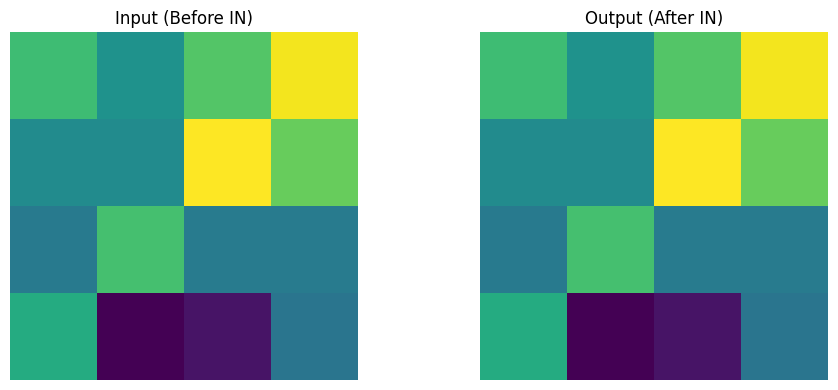

In [7]:
# Ví dụ 1: 1 Sample, 1 Kernel
np.random.seed(42)
x1 = np.random.randn(1, 1, 4, 4) * 10 + 5
print(f"Input shape: {x1.shape}")
print(f"Input data:\n{x1[0, 0]}")
print(f"\nInput mean: {np.mean(x1[0, 0]):.4f}, std: {np.std(x1[0, 0]):.4f}")

in1 = InstanceNorm2D(num_channels=1)
output1 = in1.forward(x1)
print(f"\nOutput shape: {output1.shape}")
print(f"Output data:\n{output1[0, 0]}")
print(f"\nOutput mean: {np.mean(output1[0, 0]):.4f}, std: {np.std(output1[0, 0]):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(x1[0, 0], cmap='viridis')
axes[0].set_title('Input (Before IN)')
axes[0].axis('off')
axes[1].imshow(output1[0, 0], cmap='viridis')
axes[1].set_title('Output (After IN)')
axes[1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 2: 1 Sample, 2 Kernels (Channels)

Shape: (1, 2, 4, 4) - 1 batch, 2 channels, 4x4 image


Input shape: (1, 2, 4, 4)
Channel 0 mean: 4.7456, std: 9.4022
Channel 1 mean: 2.5083, std: 9.0820

Channel 0 - Output mean: 0.0000, std: 1.0000
Channel 1 - Output mean: 0.0000, std: 1.0000


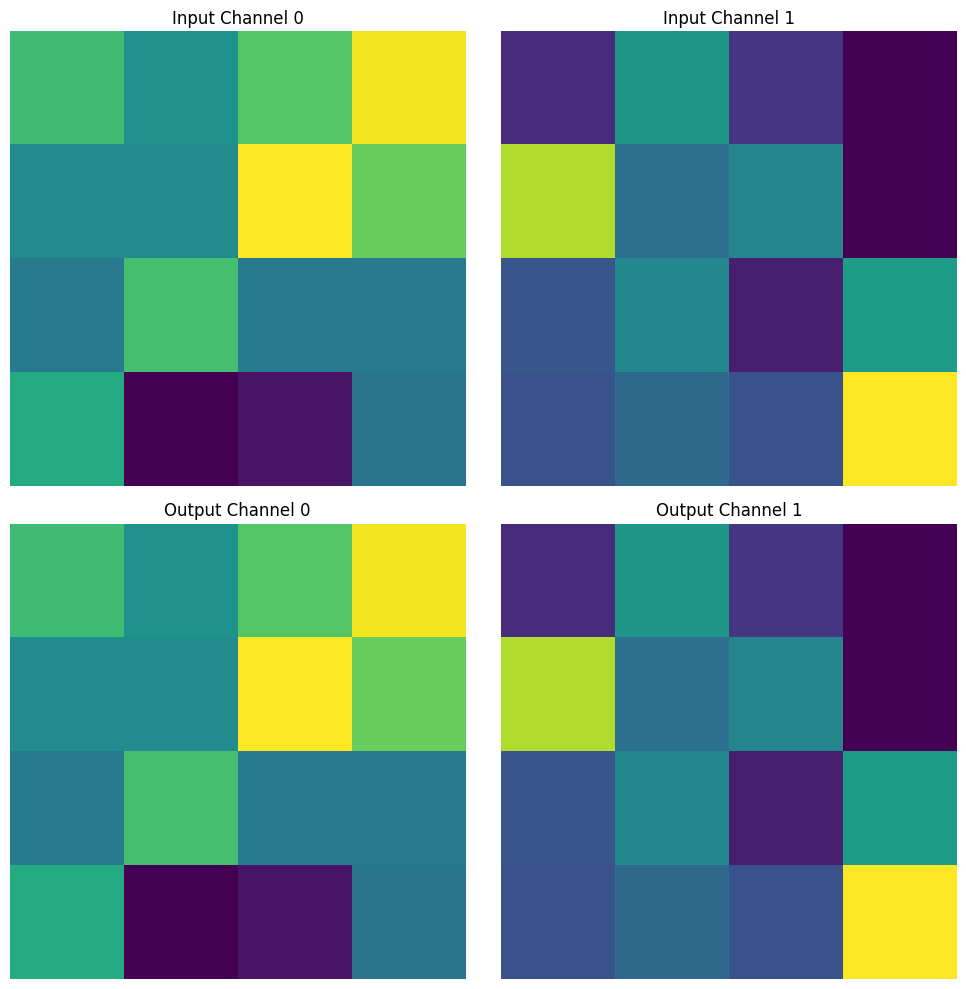

In [8]:
# Ví dụ 2: 1 Sample, 2 Kernels
np.random.seed(42)
x2 = np.random.randn(1, 2, 4, 4) * 10 + 5
print(f"Input shape: {x2.shape}")
print(f"Channel 0 mean: {np.mean(x2[0, 0]):.4f}, std: {np.std(x2[0, 0]):.4f}")
print(f"Channel 1 mean: {np.mean(x2[0, 1]):.4f}, std: {np.std(x2[0, 1]):.4f}")

in2 = InstanceNorm2D(num_channels=2)
output2 = in2.forward(x2)
print(f"\nChannel 0 - Output mean: {np.mean(output2[0, 0]):.4f}, std: {np.std(output2[0, 0]):.4f}")
print(f"Channel 1 - Output mean: {np.mean(output2[0, 1]):.4f}, std: {np.std(output2[0, 1]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x2[0, 0], cmap='viridis')
axes[0, 0].set_title('Input Channel 0')
axes[0, 0].axis('off')
axes[0, 1].imshow(x2[0, 1], cmap='viridis')
axes[0, 1].set_title('Input Channel 1')
axes[0, 1].axis('off')
axes[1, 0].imshow(output2[0, 0], cmap='viridis')
axes[1, 0].set_title('Output Channel 0')
axes[1, 0].axis('off')
axes[1, 1].imshow(output2[0, 1], cmap='viridis')
axes[1, 1].set_title('Output Channel 1')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 3: 2 Samples, 1 Kernel (Channel)

Shape: (2, 1, 4, 4) - 2 batches, 1 channel, 4x4 image


Input shape: (2, 1, 4, 4)
Sample 0 mean: 4.7456, std: 9.4022
Sample 1 mean: 2.5083, std: 9.0820

Sample 0 - Output mean: 0.0000, std: 1.0000
Sample 1 - Output mean: 0.0000, std: 1.0000


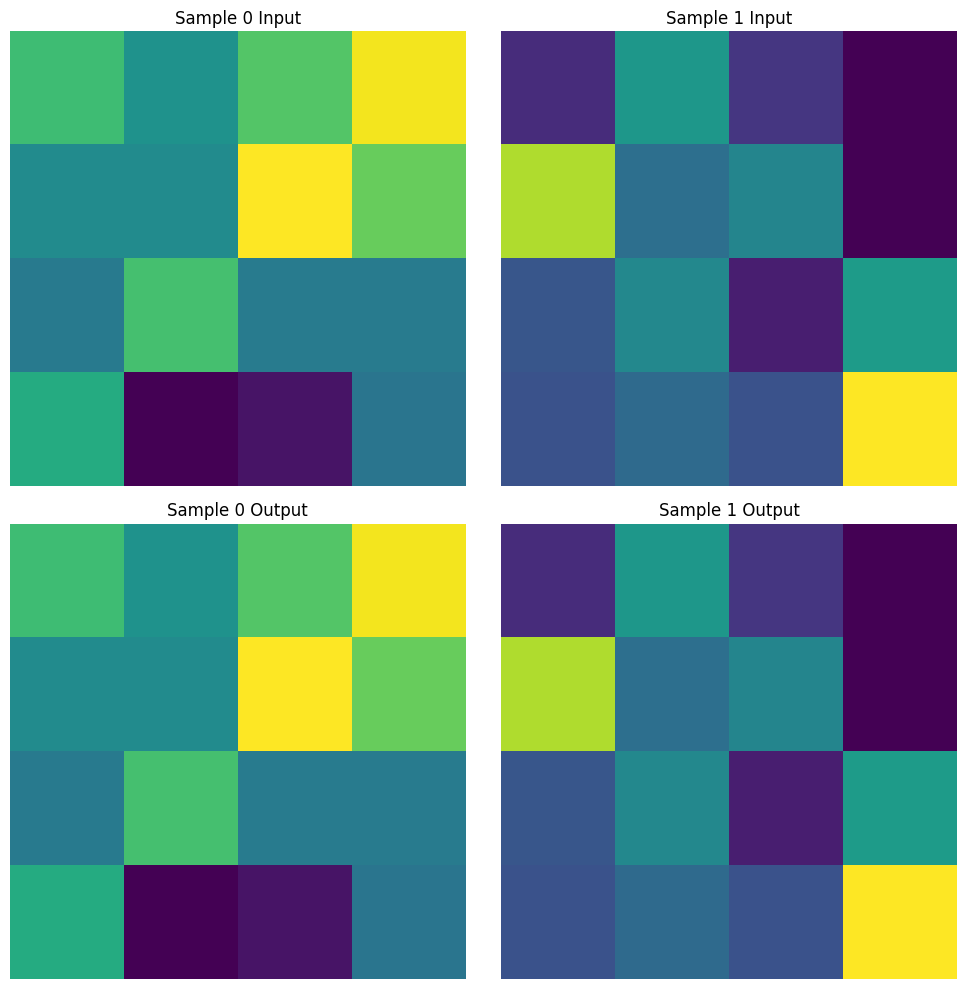

In [9]:
# Ví dụ 3: 2 Samples, 1 Kernel
np.random.seed(42)
x3 = np.random.randn(2, 1, 4, 4) * 10 + 5
print(f"Input shape: {x3.shape}")
print(f"Sample 0 mean: {np.mean(x3[0, 0]):.4f}, std: {np.std(x3[0, 0]):.4f}")
print(f"Sample 1 mean: {np.mean(x3[1, 0]):.4f}, std: {np.std(x3[1, 0]):.4f}")

in3 = InstanceNorm2D(num_channels=1)
output3 = in3.forward(x3)
print(f"\nSample 0 - Output mean: {np.mean(output3[0, 0]):.4f}, std: {np.std(output3[0, 0]):.4f}")
print(f"Sample 1 - Output mean: {np.mean(output3[1, 0]):.4f}, std: {np.std(output3[1, 0]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x3[0, 0], cmap='viridis')
axes[0, 0].set_title('Sample 0 Input')
axes[0, 0].axis('off')
axes[0, 1].imshow(x3[1, 0], cmap='viridis')
axes[0, 1].set_title('Sample 1 Input')
axes[0, 1].axis('off')
axes[1, 0].imshow(output3[0, 0], cmap='viridis')
axes[1, 0].set_title('Sample 0 Output')
axes[1, 0].axis('off')
axes[1, 1].imshow(output3[1, 0], cmap='viridis')
axes[1, 1].set_title('Sample 1 Output')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 4: 2 Samples, 2 Kernels (Channels)

Shape: (2, 2, 4, 4) - 2 batches, 2 channels, 4x4 image


Input shape: (2, 2, 4, 4)
Sample 0, Channel 0 - Input mean: 4.7456, std: 9.4022
Sample 0, Channel 0 - Output mean: 0.0000, std: 1.0000
Sample 0, Channel 1 - Input mean: 2.5083, std: 9.0820
Sample 0, Channel 1 - Output mean: 0.0000, std: 1.0000
Sample 1, Channel 0 - Input mean: 1.5872, std: 8.5957
Sample 1, Channel 0 - Output mean: 0.0000, std: 1.0000
Sample 1, Channel 1 - Input mean: 3.5048, std: 8.1643
Sample 1, Channel 1 - Output mean: 0.0000, std: 1.0000


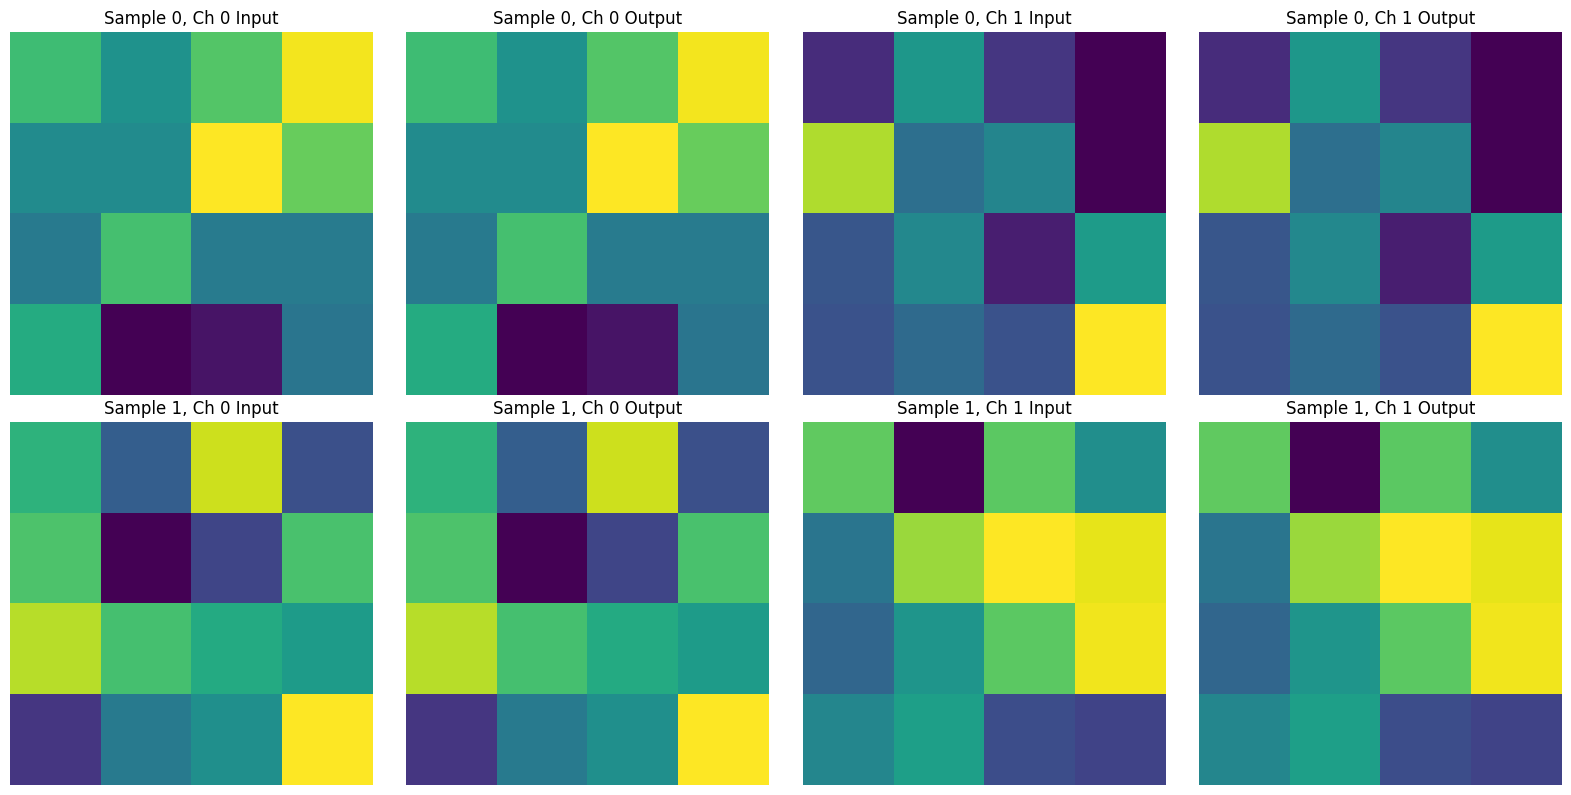

In [10]:
# Ví dụ 4: 2 Samples, 2 Kernels
np.random.seed(42)
x4 = np.random.randn(2, 2, 4, 4) * 10 + 5
print(f"Input shape: {x4.shape}")

in4 = InstanceNorm2D(num_channels=2)
output4 = in4.forward(x4)

for b in range(2):
    for c in range(2):
        print(f"Sample {b}, Channel {c} - Input mean: {np.mean(x4[b, c]):.4f}, std: {np.std(x4[b, c]):.4f}")
        print(f"Sample {b}, Channel {c} - Output mean: {np.mean(output4[b, c]):.4f}, std: {np.std(output4[b, c]):.4f}")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for b in range(2):
    for c in range(2):
        axes[b, c*2].imshow(x4[b, c], cmap='viridis')
        axes[b, c*2].set_title(f'Sample {b}, Ch {c} Input')
        axes[b, c*2].axis('off')
        axes[b, c*2+1].imshow(output4[b, c], cmap='viridis')
        axes[b, c*2+1].set_title(f'Sample {b}, Ch {c} Output')
        axes[b, c*2+1].axis('off')
plt.tight_layout()
plt.show()
